<a href="https://colab.research.google.com/github/krymsza/combustion-simulation/blob/main/CH3NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####info
```
Flash point	35 °C (95 °F; 308 K)
Autoignition temperature	418 °C (784 °F; 691 K)
Explosive limits	7–22%
```

``` 
mix: 10% nitromethane / 90% air
```

#### env setup 

In [1]:
!apt-get -qq update -y
!apt-get -qq install -y python3-software-properties
!apt-add-repository -y ppa:speth/cantera > /dev/null 2>&1
#!apt-get -qq install -y cantera #-python3

In [2]:
!pip install cantera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 37.8 MB/s eta 0:00:00


##### imports

In [3]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import os
import csv

In [4]:
#%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 40

plt.style.use("ggplot")
plt.style.use("seaborn-pastel")

<ipython-input-4-0ec0c67617bb>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


##### downloading yaml files with nitromethane data

In [5]:
 #Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pathlib import Path
import os

def download_and_save(file_name, file_id):
  downloaded = drive.CreateFile({'id': file_id})
  # fetch file
  downloaded.FetchContent()
  # write file
  with open(file_name,'wb') as f:
       f.write(downloaded.content.read())
      
  print(f'Saved {file_name}')
  
FILE_NAME, FILE_ID = ['file_name', 'file_id']

In [6]:
#https://drive.google.com/file/d/11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf/view?usp=share_link

In [7]:
dataset_path = Path('/usr/local/lib/python3.10/dist-packages/cantera/data/'); dataset_path
!mkdir -p $dataset_path
#!ls -la $dataset_path

In [8]:
file = {FILE_NAME: 'Fuller.yaml', FILE_ID: '11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf'}
file_path = dataset_path / file[FILE_NAME]
download_and_save(file_path, file[FILE_ID])

Saved /usr/local/lib/python3.10/dist-packages/cantera/data/Fuller.yaml


##### create solution with fuller file

In [9]:
gas = ct.Solution('Fuller.yaml')

<ipython-input-9-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-9-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-9-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-9-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species NCC

#### gas & reservoirs

In [216]:
#FUEL
gas = ct.Solution('Fuller.yaml')
gas.TPX = 300, 10*ct.one_atm,  'CH3NO2:1'
fuel_res = ct.Reservoir(contents=gas)

<ipython-input-216-52cd8c2ebd19>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-216-52cd8c2ebd19>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-216-52cd8c2ebd19>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-216-52cd8c2ebd19>:2: UserWarning: NasaPoly2::validate: 
For spe

In [217]:
#IGNITER
gas.TPX = 5000, ct.one_atm, 'O2:1.0' 
igniter = ct.Reservoir(gas)
gas()


  gas:

       temperature   5000 K
          pressure   1.0132e+05 Pa
           density   0.077989 kg/m^3
  mean mol. weight   31.998 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.6687e+06        1.8139e+08  J
   internal energy        4.3695e+06        1.3981e+08  J
           entropy              9554        3.0571e+05  J/K
    Gibbs function       -4.2101e+07       -1.3472e+09  J
 heat capacity c_p            1344.6             43024  J/K
 heat capacity c_v            1084.7             34709  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2                 1                 1           -32.405
     [ +834 minor]                 0                 0  



In [218]:
#AIR
air = ct.Solution('Fuller.yaml')
air.TPX = 500, ct.one_atm*5, 'O2:1. N2:3.76'  #CH3NO2:0.5
air.equilibrate('TP')

#COMBUSTOR FILLED WITH AIR
vol = 0.0005   #0.5L combustor volume[m3]  0,001 m³=1L
combustor = ct.Reactor(air)       #Reactor(air)
combustor.volume = vol

<ipython-input-218-743acb13945f>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  air = ct.Solution('Fuller.yaml')
<ipython-input-218-743acb13945f>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  air = ct.Solution('Fuller.yaml')
<ipython-input-218-743acb13945f>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  air = ct.Solution('Fuller.yaml')
<ipython-input-218-743acb13945f>:2: UserWarning: NasaPoly2::validate: 
For spe

####  fuel injector setup

In [219]:
# calculation of the required mass of fuel
# air.density * vol(0.0005) = mass of air [kg] in reservior
# air_mass / 1.806  = mass of fuel [kg]

air_mass = air.density * vol
fuel_mass = air_mass / 1.806

# setting the proportion of the mixture within the explosive limits
print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )
fuel_mass = fuel_mass/2.0
print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )

0.0009734086307933478 0.0017579759872127863  ratio: 55.370985603543744 %
0.0004867043153966739 0.0017579759872127863  ratio: 27.685492801771872 %


In [220]:
# fuel is supplied as a Gaussian pulse
def fuel_mdot(t):
    total = 0.00010815651063783457   # mass of fuel [kg] = fuel_mass
    width = 0.1  # width of the pulse [s]
    t0 = 1.0  # time of fuel pulse peak [s]
    amplitude = total / (width * np.sqrt(2*np.pi))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))

In [221]:
# injector is modeled as a mass flow controller
injector_mfc = ct.MassFlowController(fuel_res, combustor, mdot= fuel_mdot)

#### igniter setup

In [222]:
# calculation of the fuel mass for the igniter
igniter_mass = fuel_mass/1e2
igniter_mass

4.867043153966739e-06

In [223]:
def igniter_mdot(t):
    total = 1.0815651063783458e-03 #6   # mass of fuel [kg] = fuel_mass
    width = 0.1  # width of the pulse [s]
    t0 = 2.5  # time of fuel pulse peak [s]
    amplitude = total / (width * np.sqrt(2*np.pi))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))

In [224]:
igniter_mfc = ct.MassFlowController(igniter, combustor, mdot = igniter_mdot)

#### simulation

In [225]:
sim = ct.ReactorNet([combustor])
sim.rtol = 1.e-14
sim.atol = 1.e-19 

In [226]:
#combustor.get_state()
starting_mass = combustor.mass
print(combustor.mass)
print(combustor.thermo.element_names)

0.0017579759872127863
['C', 'H', 'N', 'O', 'Ar', 'He']


In [227]:
time = 0.0
n_steps = 30000
states = ct.SolutionArray(gas, extra=['t', 'V'])

for n in range(n_steps):
    time += 1.5e-4
    sim.advance(time)
    print(str(n) + '->'+ str(time) +  '  c.T:'+ str(combustor.T)+ '  c.mass: '+
         str(combustor.mass))
    states.append(combustor.thermo.state, t=time, V=combustor.mass)
    n+=1
#FUEL t0 = 1 / IGNITER t0 = 2

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
25001->3.750300000001658  c.T:2860.0798700588525  c.mass: 0.0029476976042055254
25002->3.750450000001658  c.T:2860.0798700588584  c.mass: 0.0029476976042055254
25003->3.750600000001658  c.T:2860.0798700588625  c.mass: 0.0029476976042055254
25004->3.7507500000016583  c.T:2860.0798700588693  c.mass: 0.0029476976042055254
25005->3.7509000000016584  c.T:2860.0798700588757  c.mass: 0.0029476976042055254
25006->3.7510500000016584  c.T:2860.079870058882  c.mass: 0.0029476976042055254
25007->3.7512000000016585  c.T:2860.0798700588866  c.mass: 0.0029476976042055254
25008->3.7513500000016586  c.T:2860.0798700588934  c.mass: 0.0029476976042055254
25009->3.7515000000016587  c.T:2860.0798700589003  c.mass: 0.0029476976042055254
25010->3.751650000001659  c.T:2860.079870058905  c.mass: 0.0029476976042055254
25011->3.751800000001659  c.T:2860.079870058912  c.mass: 0.0029476976042055254
25012->3.751950000001659  c.T:2860.0798700589166  c.

In [228]:
end_mass = combustor.mass
fuel_in_mass = end_mass - starting_mass
print('fuel injected ', fuel_in_mass)
print('igniter fuel ', fuel_in_mass - fuel_mass)

fuel injected  0.0011897216169927392
igniter fuel  0.0007030173015960652


### visualization 

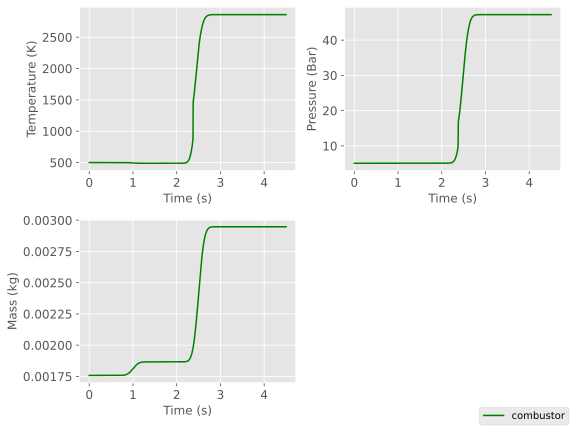

In [229]:
plt.figure(figsize=(8, 6), dpi=40)
plt.subplot(2, 2, 1)
h = plt.plot(states.t, states.T, 'g-')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(states.t, states.P / 1e5, 'g-')
# plt.legend(['r_air','combustor'], 2)
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Bar)')

plt.subplot(2, 2, 3)
plt.plot(states.t, states.V, 'g-')
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')

plt.figlegend(h, ['combustor'], loc='lower right')
plt.tight_layout()
plt.savefig('foo1.png')
plt.show()


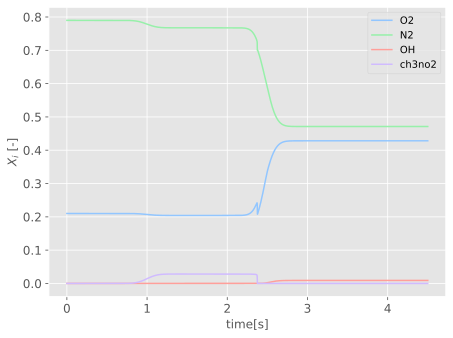

In [230]:
# gas composition

xticks = np.arange(0, 0.18, 0.02)
fig, ax = plt.subplots()
ax.plot(states.t, states('O2').X, label='O2')
ax.plot(states.t, states('N2').X, label='N2')
ax.plot(states.t, states('OH').X, label='OH')
#ax.plot(states.t, states('h').X, label='H')
#ax.plot(states.t, states('co').X, label='CO')
ax.plot(states.t, states('CH3NO2').X, label='ch3no2')
ax.legend(loc=0)
ax.set_ylabel('$X_i$ [-]')
ax.set_xlabel(r'time[s]')
#ax.set_xticks(xticks)
#ax.set_xticklabels(ca_ticks(xticks))
plt.show()

# brudnopis


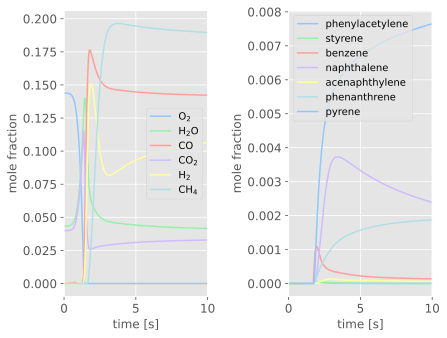

Text(0, 0.5, 'Temperature (K)')

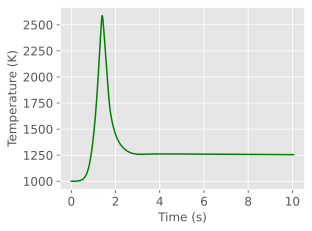

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

# Use a reduced n-dodecane mechanism with PAH formation pathways
gas = ct.Solution('nDodecane_Reitz.yaml', 'nDodecane_IG')
gas.case_sensitive_species_names = True

# Create a Reservoir for the fuel inlet, set to pure dodecane
gas.TPX = 300, 20*ct.one_atm, 'c12h26:1.0'
inlet = ct.Reservoir(gas)

# Create Reactor and set initial contents to be products of lean combustion
gas.TP = 1000, 20*ct.one_atm
gas.set_equivalence_ratio(0.30, 'c12h26', 'n2:3.76, o2:1.0')
gas.equilibrate('TP')
r = ct.IdealGasReactor(gas)
r.volume = 0.001  # 1 liter


def fuel_mdot(t):
    """Create an inlet for the fuel, supplied as a Gaussian pulse"""
    total = 3.0e-3  # mass of fuel [kg]
    width = 0.5  # width of the pulse [s]
    t0 = 2.0  # time of fuel pulse peak [s]
    amplitude = total / (width * np.sqrt(2*np.pi))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))


mfc = ct.MassFlowController(inlet, r, mdot=fuel_mdot)

# Create the reactor network
sim = ct.ReactorNet([r])

# Integrate for 10 seconds, storing the results for later plotting
tfinal = 10.0
tnow = 0.0
i = 0
tprev = tnow
states = ct.SolutionArray(gas, extra=['t'])
states2 = ct.SolutionArray(gas, extra=['t'])

while tnow < tfinal:
    tnow = sim.step()
    i += 1
    # Storing results after every step can be excessive. Instead, store results
    # every 10 steps, or more frequently if large steps are being taken.
    if tnow-tprev > 1e-2 or i == 10:
        i = 0
        tprev = tnow
        states.append(r.thermo.state, t=tnow)
        states2.append(r.thermo.state, t=tnow)

# nice names for species, including PAH species that can be considered
# as precursors to soot formation
species_aliases = {
    'o2': 'O$_2$',
    'h2o': 'H$_2$O',
    'co': 'CO',
    'co2': 'CO$_2$',
    'h2': 'H$_2$',
    'ch4': 'CH$_4$'
}
for name, alias in species_aliases.items():
    gas.add_species_alias(name, alias)

pah_aliases = {
    'A1c2h': 'phenylacetylene',
    'A1c2h3': 'styrene',
    'A1': 'benzene',
    'A2': 'naphthalene',
    'A2r5': 'acenaphthylene',
    'A3': 'phenanthrene',
    'A4': 'pyrene'
}
for name, alias in pah_aliases.items():
    gas.add_species_alias(name, alias)

# Plot the concentrations of species of interest
f, ax = plt.subplots(1, 2)

for s in species_aliases.values():
    ax[0].plot(states.t, states(s).X, label=s)

for s in pah_aliases.values():
    ax[1].plot(states.t, states(s).X, label=s)

for a in ax:
    a.legend(loc='best')
    a.set_xlabel('time [s]')
    a.set_ylabel('mole fraction')
    a.set_xlim([0, tfinal])

f.tight_layout()
plt.show()


plt.figure(figsize=(8, 6), dpi=40)
plt.subplot(2, 2, 1)
h = plt.plot(states2.t, states2.T, 'g-')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')